In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
import re

In [2]:

def make_ini_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt', skiprows=2, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    
    y = (xl[t_vl==t] * 512)
    x = ((1-yl[t_vl==t]) * 512)
    rl = rl[t_vl==t]

    # Get the flags for each position using the check_split_timeframe function
    flags = [check_split_timeframe(t, int(id), t_vl, idel, split_l) for id in idel[t_vl==t]]

    # Assign colors based on the flags
    color_map = {
        -1: [255, 50, 0],
        -2: [255, 100, 0],
        -3: [255, 150, 0],
        -4: [255, 200, 0],
        0: [0, 255, 0],  # Default to white if none of the conditions is met
        1: [255, 255, 0],
        2: [170, 255, 0],
        3: [85, 255, 0],
        99: [255, 0, 0]
    }
    
    colors = [color_map[flag] for flag in flags]
    
    positions = list(zip(x, y))
    
    # Pass the positions list and colors to the ind2CNet function
    image_tensor = ind2CNet(positions, rl, colors)
    
    save_dir = '/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/id/'
    
    output_path = save_dir + str(t) + '.jpg'
    cv2.imwrite(output_path, image_tensor)
    
    plt.imshow(image_tensor)
    plt.axis('off')
    plt.show()


'''
def make_ini_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=2, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    y=(xl[t_vl==t] * 512)
    x=((1-yl[t_vl==t]) * 512)
    rl=rl[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2CNet(positions,rl)  # Pass the positions list to the ind2CNet function

    #image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/id/'
    
    output_path = save_dir+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
'''    
def make_id_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=2, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    x=(xl[t_vl==t] * 512)
    y=(yl[t_vl==t] * 512)
    ide=idel[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2id(positions,idel,ide)  # Pass the positions list to the ind2CNet function

    image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/id/'
    
    output_path = save_dir+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
    
    
def make_circ_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    x=(xl[t_vl==t] * 512)
    y=(yl[t_vl==t] * 512)
    rl=rl[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2circ(positions,rl)  # Pass the positions list to the ind2CNet function

    image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/'
    
    output_path = save_dir+'/circ/'+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    #image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    #plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


def ind2CNet(ind_list, values, colors):
    image_tensor = np.zeros((512, 512, 3),dtype=np.uint8)  # Initialize a 3-channel image

    radius=12

    for (x, y), color in zip(ind_list, colors):
        x, y = int(x), int(y)
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if i**2 + j**2 <= radius**2:
                    try:
                        image_tensor[x+i, y+j] = color  # Set the pixel value to the specified color
                    except IndexError:
                        pass

    return image_tensor


def sort_key(file_name):
    # Extract the number from the file name
    number = re.findall(r'\d+', file_name)
    if number:
        return int(number[0])
    else:
        return 0

def ind2circ(ind_list,values):
    # Define the image tensor with 3 channels (RGB)
    image_tensor =  np.ones((512, 512, 3), dtype=np.uint8)*255

    # Define the radius of the circle
    #radius = 15

    # Define the color of the circle (red)
    color = (0, 0, 255)

    # Define the list of positions
    #positions = ind_list
    
    for position, value in zip(ind_list, values):
        x, y = int(position[0]), int(position[1])
        radius = 12
        print('radius',radius)
         # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if (i**2 + j**2) >= (radius-1)**2 and (i**2 + j**2) <= (radius+1)**2:
                    try:
                        image_tensor[x+i, y+j] = color
                    except IndexError:
                        pass
    return image_tensor


def ind2id(ind_list,idel,ide):
    
    max_id = np.max(idel)
    
    c_list = np.linspace(100,255,int(max_id))

    image_tensor =  np.zeros((512, 512),dtype=np.uint8)

    # Define the radius of the ball
    radius = 5

    # Define the color of the ball (white)
    #color = (255, 255, 255)

    # Define the list of positions
    positions = ind_list
    #print('ind',ind_list)


    k=0
    # Loop over the positions and draw a circle around each one
    for position in positions:
        # Convert the position to integer coordinates
        #try:
        x, y = int(position[0]), int(position[1])
        
        print('**',x,y,ide[k],c_list[int(ide[k]-1)])

        # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if i**2 + j**2 <= radius**2:
                    try:
                        image_tensor[x+i, y+j] = c_list[int(ide[k]-1)]
                    except IndexError:
                        pass#print('IndErr',i,j)
                    
        k=k+1
        #except: 
           # pass


    return image_tensor


def combine_images(image_folder, circle_folder):
    # Sort file lists
    image_files = sorted(os.listdir(image_folder),key=sort_key)
    print('image_files',image_files)
    circle_files = sorted([f for f in os.listdir(circle_folder) if os.path.splitext(f)[1].lower() == ".jpg"], key=sort_key)
    print('circ_files',circle_files)

    for img_file, circle_file in zip(image_files, circle_files):
        # Open the base image and the circle image
        image = Image.open(os.path.join(image_folder, img_file))
        circle_image = Image.open(os.path.join(circle_folder, circle_file))
        
        circle_image = circle_image.convert("RGBA")
        datas = circle_image.getdata()

        new_data = []
        for item in datas:
            # change all white (also shades of whites)
            # pixels to transparent
            if item[1] > 40 and item[2] > 40:
                new_data.append((item[0], item[1], item[2], 0))
            else:
                new_data.append(item)
                
        circle_image.putdata(new_data)

        # Scale the circle image
        circle_image = circle_image.resize((512, 512), 3)

        # Copy the circle layer onto the base image
        image.paste(circle_image, (0,0), circle_image)

        # Save the resulting image
        image.save(os.path.join(image_folder, "combined_" + img_file))

        
        
def map_value_linear(value, in_min, in_max, out_min, out_max):
    # Ensure the input value is within the input range
    value = max(min(value, in_max), in_min)
    
    if value==in_min:
        return 1
    elif value== in_max:
        return 8

    # Map the value to the output range using linear interpolation
    return int((value - in_min) * (out_max - out_min) / (in_max - in_min) + out_min)


def check_split_timeframe(t, cell_id, t_vl, idel, split_l):
    # Search for the cell with the given cell_id
    indices = np.where(idel == cell_id)[0]  # Find all indices where idel matches cell_id
    
    for index in indices:
        if split_l[index] != 0.0:  # If the cell has a split_id
            split_time = t_vl[index]  # Extract the time of splitting
            time_difference = t - split_time
            
            # Check splitting timeframes
            if time_difference == 1:
                return -1
            elif time_difference == 2:
                return -2
            elif time_difference == 3:
                return -3
            elif time_difference == 4:
                return -4
            elif time_difference == 0:
                return 99
            
    
    # Check for merges
    child_indices = np.where(split_l == cell_id)[0]  # Find all indices where the cell is a parent
    for index in child_indices:
        merge_time = t_vl[index]  # Extract the time of merging
        time_difference = merge_time - t
        
        # Check merging timeframes
        if time_difference == 1:
            return 1
        elif time_difference == 2:
            return 2
        elif time_difference == 3:
            return 3
                
    # If neither condition is met, return flag=0
    return 0


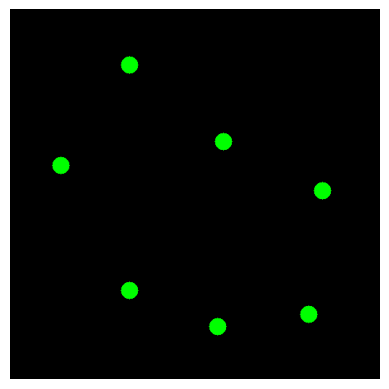

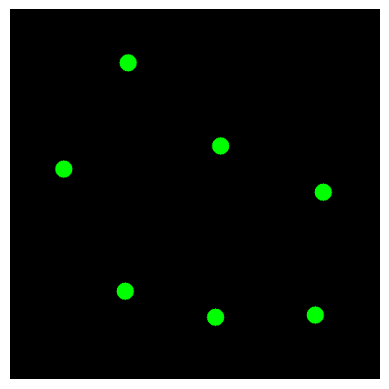

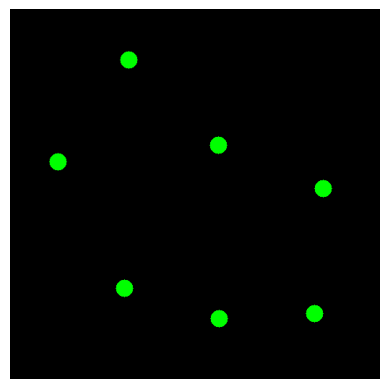

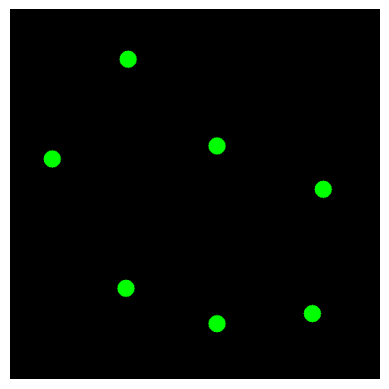

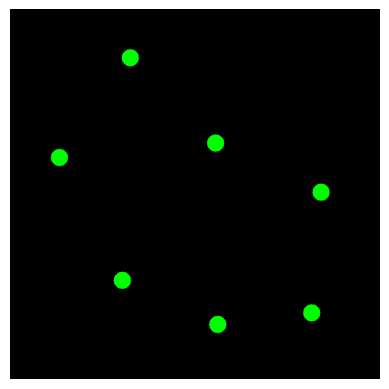

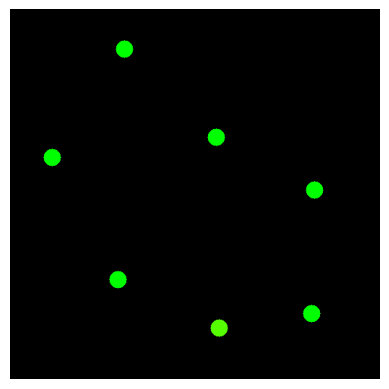

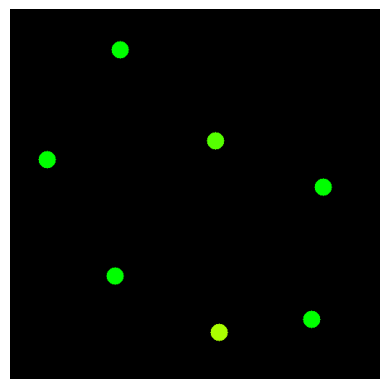

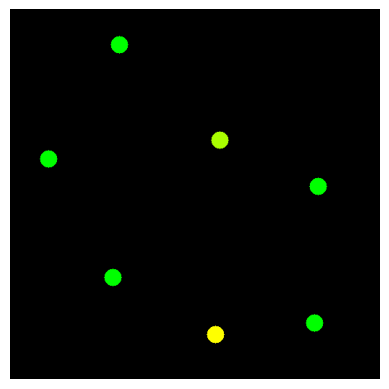

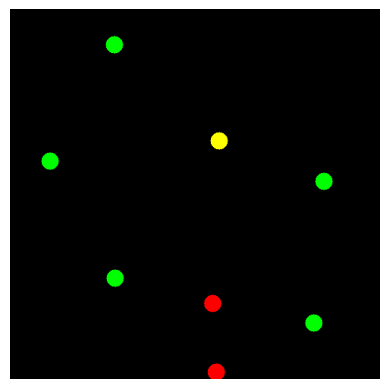

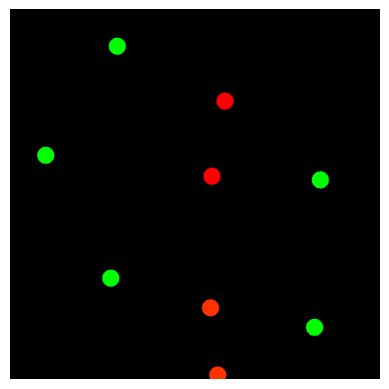

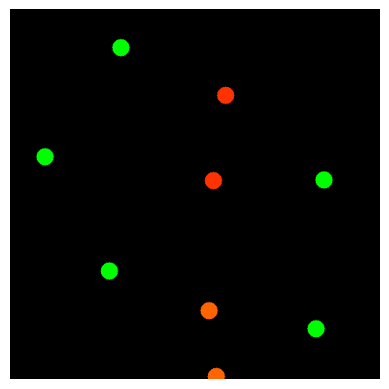

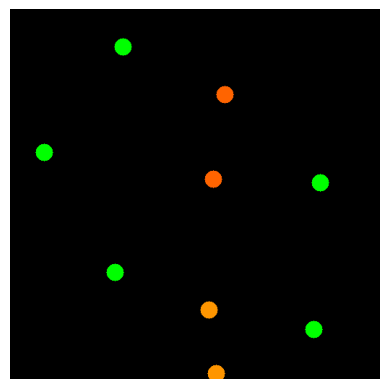

In [3]:
path_GT='2_GT'

for z in range(12):
    make_ini_pic(path_GT, t=z)

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


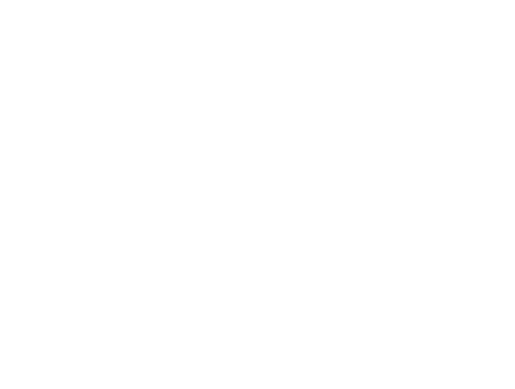

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


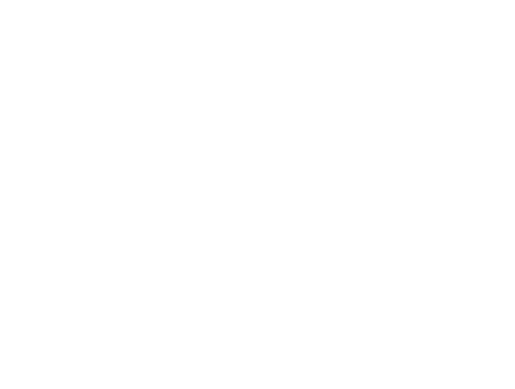

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


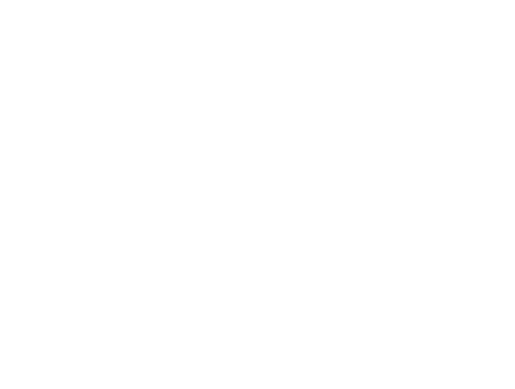

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


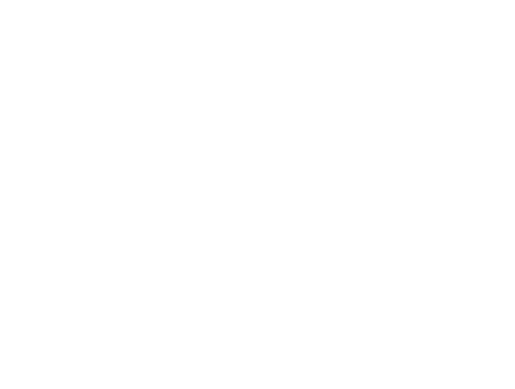

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


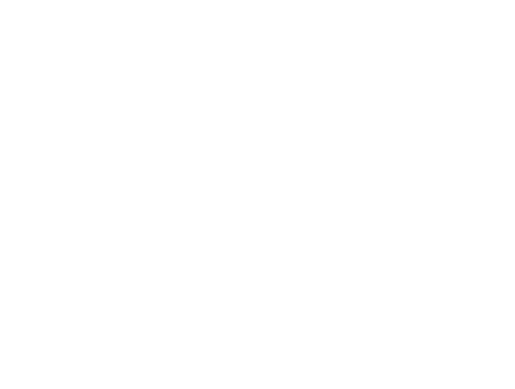

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


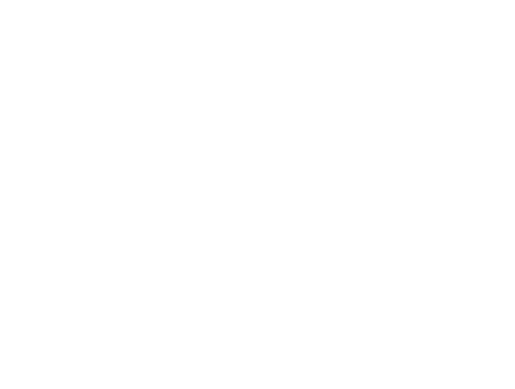

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


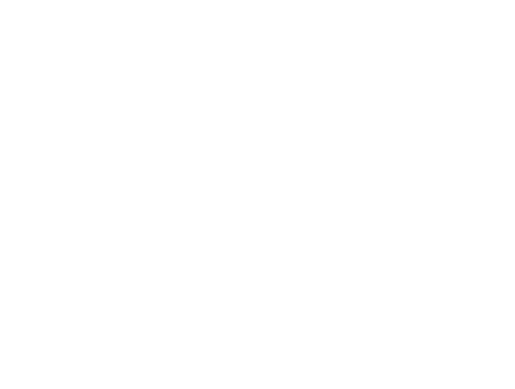

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


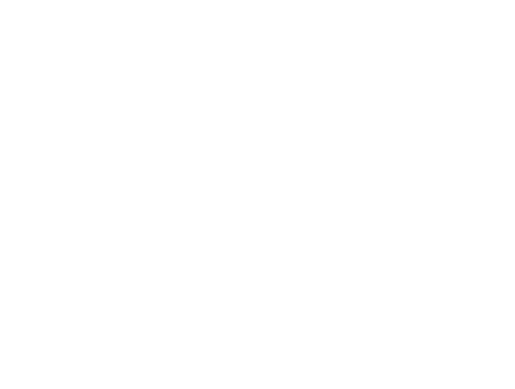

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


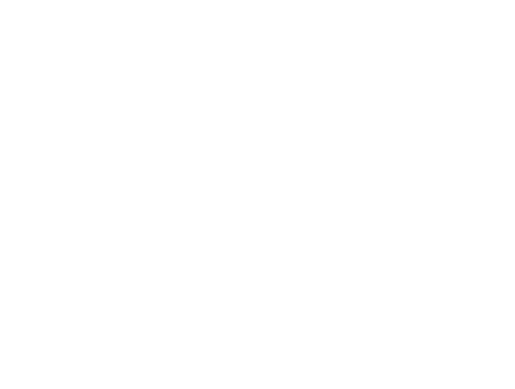

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


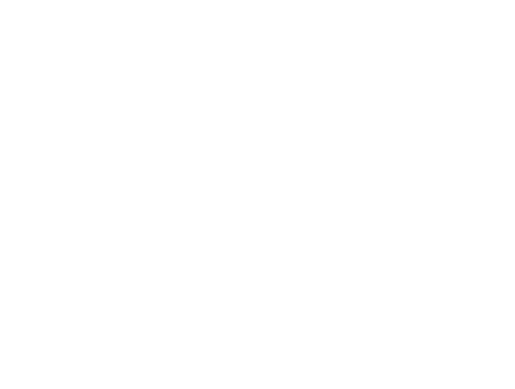

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


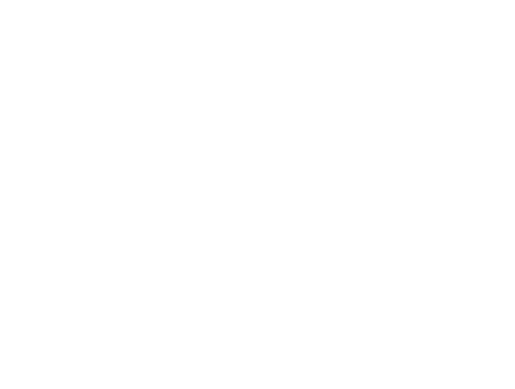

radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12
radius 12


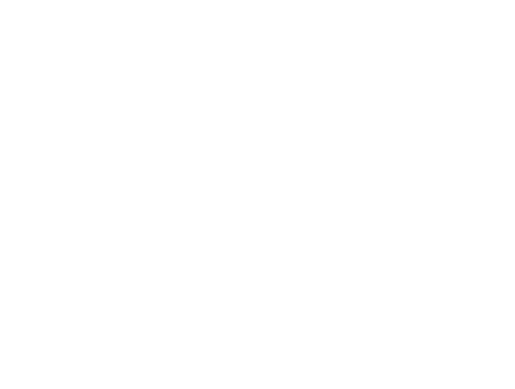

In [4]:
path_GT='2_GT'

for z in range(12):
    make_circ_pic(path_GT, t=z)

In [5]:
combine_images('/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/res_track', '/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/circ')

image_files []
circ_files ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg']


In [6]:
#path_GT='2_GT'

#for z in range(31):
#    make_id_pic(path_GT, t=z)